<a href="https://colab.research.google.com/github/wj198414/ASTRON5205_2025/blob/main/Week_02_NASA_Exoplanet_Archive_data_explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# tab = astropy.io.ascii.read("/content/drive/My Drive/Colab Notebooks/PS_2020.12.15_09.21.06.csv") # For 2020
tab = astropy.io.ascii.read("/content/drive/My Drive/Colab Notebooks/PS_2025.01.16_06.39.23.csv") # For 2025



In [ ]:
# This is to print out the names of all columns in the table
tab.colnames

['pl_name',
 'hostname',
 'default_flag',
 'sy_snum',
 'sy_pnum',
 'discoverymethod',
 'disc_year',
 'disc_facility',
 'soltype',
 'pl_controv_flag',
 'pl_refname',
 'pl_orbper',
 'pl_orbpererr1',
 'pl_orbpererr2',
 'pl_orbperlim',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_orbsmaxlim',
 'pl_rade',
 'pl_radeerr1',
 'pl_radeerr2',
 'pl_radelim',
 'pl_radj',
 'pl_radjerr1',
 'pl_radjerr2',
 'pl_radjlim',
 'pl_bmasse',
 'pl_bmasseerr1',
 'pl_bmasseerr2',
 'pl_bmasselim',
 'pl_bmassj',
 'pl_bmassjerr1',
 'pl_bmassjerr2',
 'pl_bmassjlim',
 'pl_bmassprov',
 'pl_orbeccen',
 'pl_orbeccenerr1',
 'pl_orbeccenerr2',
 'pl_orbeccenlim',
 'pl_insol',
 'pl_insolerr1',
 'pl_insolerr2',
 'pl_insollim',
 'pl_eqt',
 'pl_eqterr1',
 'pl_eqterr2',
 'pl_eqtlim',
 'ttv_flag',
 'st_refname',
 'st_spectype',
 'st_teff',
 'st_tefferr1',
 'st_tefferr2',
 'st_tefflim',
 'st_rad',
 'st_raderr1',
 'st_raderr2',
 'st_radlim',
 'st_mass',
 'st_masserr1',
 'st_masserr2',
 'st_masslim',
 'st_met',
 'st_me

In [ ]:
np.unique(tab["discoverymethod"])

<Column name='discoverymethod' dtype='str29' length=11>
                   Astrometry
              Disk Kinematics
    Eclipse Timing Variations
                      Imaging
                 Microlensing
Orbital Brightness Modulation
                Pulsar Timing
  Pulsation Timing Variations
              Radial Velocity
                      Transit
    Transit Timing Variations

Text(0, 0.5, 'Radius [R$_{Jupiter}$]')

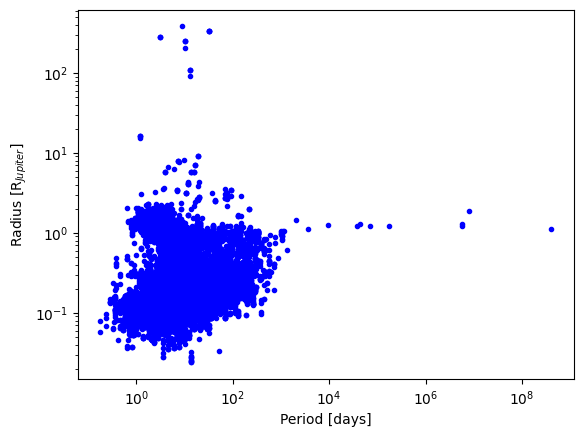

In [ ]:
plt.plot(tab["pl_orbper"], tab["pl_radj"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")

(0.01, 10)

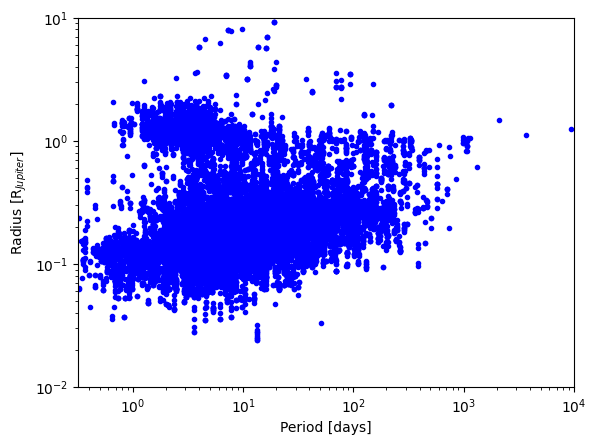

In [ ]:
# The above figure has too large a range for both x and y axis. For example, there are planets with sizes larger than 10 times jupier radii, which is not physical. Also, we are interested in planets on relative short orbital periods, so we will adjust the plot range
plt.plot(tab["pl_orbper"], tab["pl_radj"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.xlim(10**(-0.5), 10**(4))
plt.ylim(10**(-2), 10**(1))


(0.01, 10)

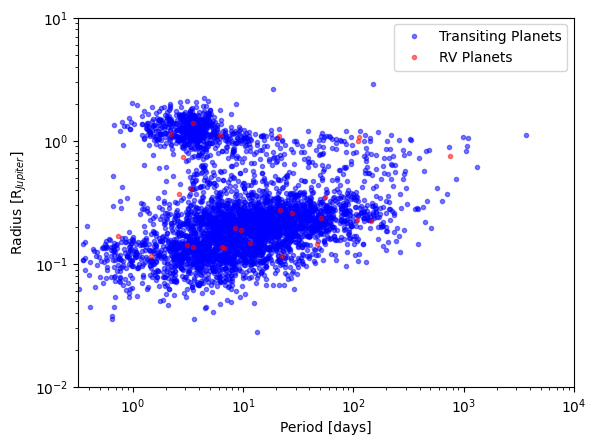

In [ ]:
# Do you notice the streaks like rain dropping from a cloud of exoplanets? That is because of multiple entries for the same system. The following selection (similar to you putting in 1 for the "default_flag" in view the online table at NASA Exoplanet Archive)

ind = np.where((tab["default_flag"] == 1) & (tab["discoverymethod"] == "Transit"))
plt.plot(tab["pl_orbper"][ind], tab["pl_radj"][ind], "b.", label="Transiting Planets", alpha=0.5)

ind = np.where((tab["default_flag"] == 1) & (tab["discoverymethod"] == "Radial Velocity"))
plt.plot(tab["pl_orbper"][ind], tab["pl_radj"][ind], "r.", label="RV Planets", alpha=0.5)

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.xlim(10**(-0.5), 10**(4))
plt.ylim(10**(-2), 10**(1))


## Now you start to see the exoplanets are dryer and a clearer separation between the gas giant planet population and smaller planets.




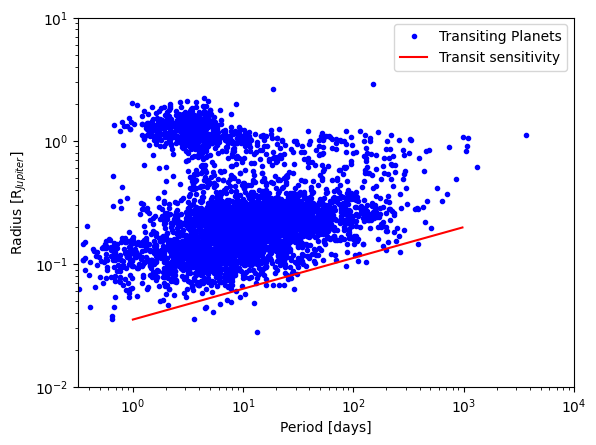

In [ ]:
p_arr = 10**np.arange(0,3,0.01) * u.day # An array of orbital period ranging from 1 to 1000 days
T = 1 * u.year
r_p_arr = np.sqrt(3. * np.sqrt(p_arr / T)) * u.earthRad

ind = np.where((tab["default_flag"] == 1) & (tab["discoverymethod"] == "Transit"))

plt.plot(tab["pl_orbper"][ind], tab["pl_radj"][ind], "b.", label="Transiting Planets")
plt.plot(p_arr.to(u.day).value, r_p_arr.to(u.jupiterRad).value, color="red", label="Transit sensitivity")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.xlim(10**(-0.5), 10**(4))
plt.ylim(10**(-2), 10**(1))
plt.legend()

## 1, How about Mass-Period plot, Mass-Semi-major axis plot, etc? How different are they and why?

## 2, Overplot solar system planets on the above plot?

## 3, Research on the state-of-the-art performance of each detection technique and overplot the sensitivity line. An example of RV is given below.

## $K = \frac{m_p}{m_\ast}\cdot\sqrt{\frac{Gm_\ast}{a}}\cdot\sin i$

## Assuming an edge-on orbit, for which $i$ is 90 degree, rearrange the equation to be:

## $m_p = K \cdot m_\ast \cdot \sqrt{\frac{a}{Gm_\ast}}$

## For a K value of 0.5 m/s, which is the state-of-the-art performance, the mass sensitivity is as follows for a range of semi major axis $a$, assuming 0.5 solar mass:

In [ ]:
import astropy.constants as ac
import astropy.units as u

In [ ]:
sma_arr = 10.0**(np.arange(5)-2) * u.AU

m_p_arr = 0.5 * u.meter / u.second * 0.5 * u.solMass * np.sqrt(sma_arr / ac.G / (0.5 * u.solMass))



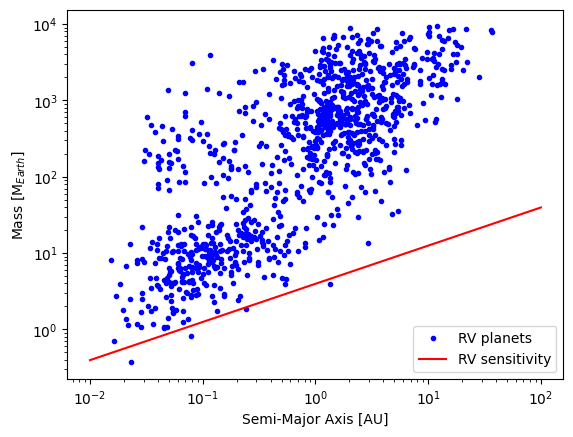

In [ ]:
ind = np.where((tab["default_flag"] == 1) & (tab["discoverymethod"] == "Radial Velocity"))


plt.plot(tab["pl_orbsmax"][ind], tab["pl_bmasse"][ind], "b.", label="RV planets")
plt.plot(sma_arr.value, m_p_arr.decompose().to(u.earthMass), color="red", label="RV sensitivity")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-Major Axis [AU]")
plt.ylabel(r"Mass [M$_{Earth}$]")
plt.legend()

## You may think about the conversin between mass and radius  when considering the sensitivity of other detection techniques.